# 📘 Spline cubico

## ✍️ Idea:
Utilizar polinomios cubicos por intervalos. Son ajustados de tal modo que los "pegues" son suaves.
## 🔍 Como funciona el spline cubico?
- Cada intervalo $[x_i, x_{i+1}]$ tiene su propio polinomio de grado 3:
  
  $$
  S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
  $$
  
- La curva total::
  - **Continua**
  - tiene primera y segunda derivadas **continuas**

- Enlos bordes las condiciones naturales son segunda derivada igual a cero.

## 🧠 Intuicion:
> "Los splines cubicos hacen su trabajo en cada pieza de la curva"

## 🧮 Algoritmo:
1. Construir polinomio de grado 3 entre dos puntos.
2. Ecuaciones:
   - los valores de los polinomios splines coinciden en cada punto.
   - Primera y segunda derivada en los puntos interiores coinciden.
   - Escoger la condicion de frontera.
3. Resolver el sistema y obtener los coeficientes.

💡  `scipy.interpolate.CubicSpline`


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator

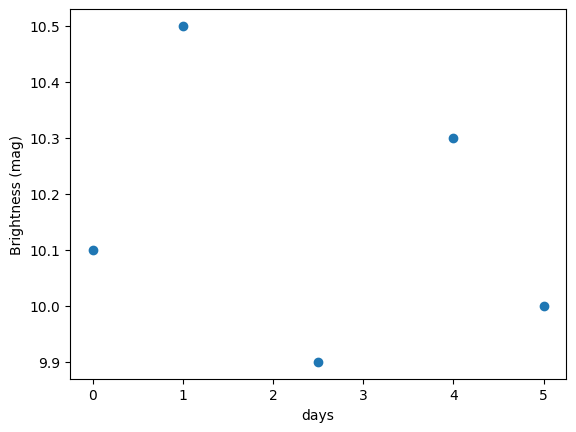

In [2]:
# datos simulados
t_data = np.array([0, 1, 2.5, 4, 5])
mag_data = np.array([10.1, 10.5, 9.9, 10.3, 10.0])

plt.plot(t_data, mag_data, 'o', label='Observed Data')
plt.xlabel('days')
plt.ylabel('Brightness (mag)')
plt.show()


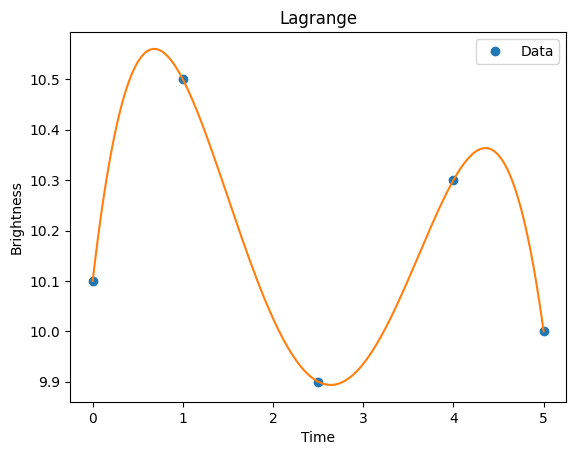

In [3]:
poly_lagrange = lagrange(t_data, mag_data)

t = np.linspace(t_data[0], t_data[-1], 200)
mag_interp_lagrange = poly_lagrange(t)

plt.plot(t_data, mag_data, 'o', label='Data')
plt.plot(t, mag_interp_lagrange, '-')
plt.title('Lagrange')
plt.xlabel('Time')
plt.ylabel('Brightness')
plt.legend()
plt.show()


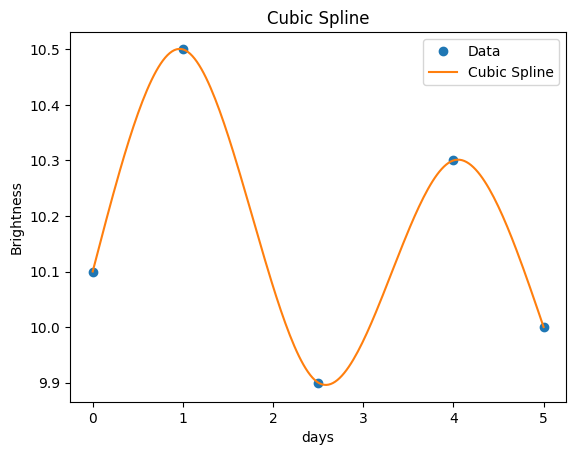

In [7]:
spline = CubicSpline(t_data, mag_data, bc_type='natural')
mag_interp_spline = spline(t)

plt.plot(t_data, mag_data, 'o', label='Data')
plt.plot(t, mag_interp_spline, '-', label='Cubic Spline')
plt.title('Cubic Spline')
plt.xlabel('days')
plt.ylabel('Brightness')
plt.legend()
plt.show()


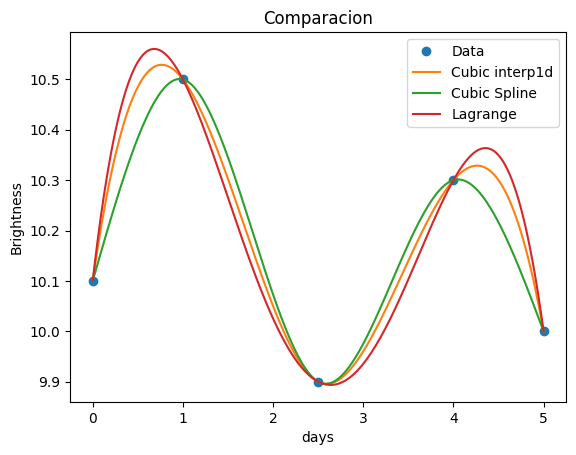

In [8]:
from scipy.interpolate import interp1d

f_cubic = interp1d(t_data, mag_data, kind='cubic')
mag_interp_cubic = f_cubic(t)


plt.plot(t_data, mag_data, 'o', label='Data')
plt.plot(t, mag_interp_cubic, '-', label='Cubic interp1d')
plt.plot(t, mag_interp_spline, '', label='Cubic Spline')
plt.plot(t, mag_interp_lagrange, '-', label='Lagrange')
plt.title('Comparacion')
plt.xlabel('days')
plt.ylabel('Brightness')
plt.legend()
plt.show()

## Ejercicio
* Estudiar la funcion de Runge $$ f(x) = \frac{1}{1+25x^2}$$
* Crear dos conjuntos:
  1. para hacer la interpolacion
  2. para probar que tan buena es la interpolacion.
* Hallar el error cuadratico medio.


In [ ]:
def runge_func(x):
  return 1/(1+25*x**2)

In [ ]:
x_runge_true = np.arange(-1,1,0.01)
f_rung_true = runge_func(x_runge_true)
len(x_runge_true)

200

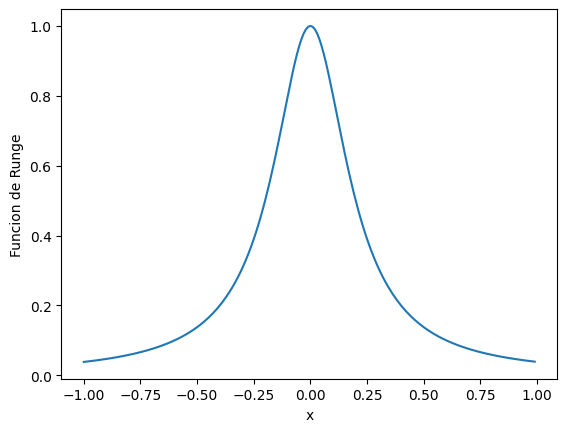

In [ ]:
plt.figure()
plt.plot(x_runge_true,f_rung_true)
plt.xlabel('x')
plt.ylabel('Funcion de Runge')
plt.show()

In [ ]:
X = np.linspace(-1,1,10)
Y = runge_func(X)
lagrange_interp = lagrange(X,Y)

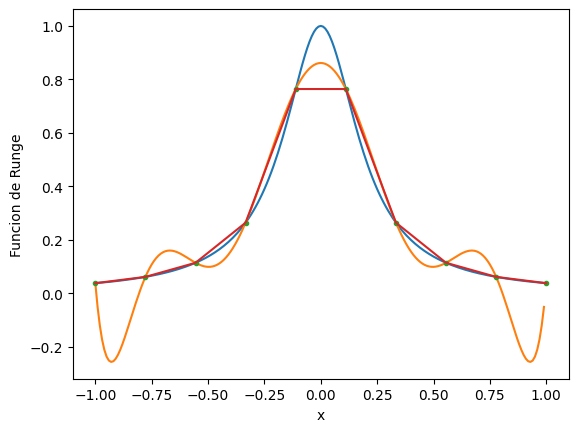

In [ ]:
plt.figure()
plt.plot(x_runge_true,f_rung_true)
plt.plot(x_runge_true, lagrange_interp(x_runge_true))
plt.plot(X, Y,'.')
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('Funcion de Runge')
plt.show()

In [ ]:
x_train = X[0::2]
x_test = X[1::2]
y_train = runge_func(x_train)
y_true = runge_func(x_test)

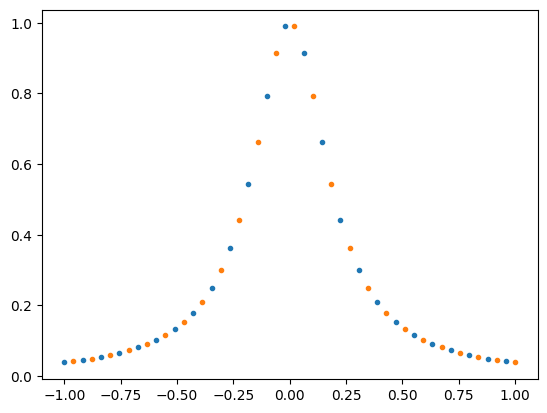

In [ ]:
plt.plot(x_train, y_train,'.')
plt.plot(x_test, y_true,'.')